In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing new data from my compilation

In [2]:
PW_Amp_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Amp")
PW_Amp_input=PW_Amp_in['my_input']
PW_Amp_PreFilt=PW_Amp_in['Amps']


In [3]:
PW_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=PW_Amp_PreFilt).cation_sum_All


In [4]:
PW_Cpx_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Cpx")
PW_Cpx_input=PW_Cpx_in['my_input']
PW_Cpx_PreFilt=PW_Cpx_in['Cpxs']

a=3.95
b=4.05

PW_Cpx_cs=pt.calculate_clinopyroxene_components(cpx_comps=PW_Cpx_PreFilt)
PW_Cpx_Sums=PW_Cpx_cs.Cation_Sum_Cpx
PW_CaCaMgFe=PW_Cpx_cs.Ca_CaMgFe
PW_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=PW_Amp_PreFilt).cation_sum_All


PW_Cpx=PW_Cpx_PreFilt.loc[(PW_Cpx_Sums.between(a, b)) & (PW_CaCaMgFe>0.2) ]
PW_Amp=PW_Amp_PreFilt.loc[PW_Amp_Sums.between(15.5, 16)]


PW_Cpx_nosuf=PW_Cpx.copy()
PW_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in PW_Cpx_nosuf.columns]

PW_Amp_nosuf=PW_Amp.copy()
PW_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
PW_Amp_nosuf.columns = [col.replace('_Amp', '') for col in PW_Amp_nosuf.columns]


PW_Amp_nosuf['Phase']=0
PW_Cpx_nosuf['Phase']=1
PW_Combo=pd.concat([PW_Cpx_nosuf, PW_Amp_nosuf], axis=0, ignore_index=True)#.reset_index(drop=True, inplace=True)
PW_Y=PW_Combo['Phase']
PW_Combo_noclass=PW_Combo.drop(columns=['Phase'])
PW_X=PW_Combo_noclass.values

## Importing LEPR data from Keith's barometry calibrations
- Amp compositions stored in LEPR_Amp
- Cpx compositions stored in Cpx_Amp, have already taken out those with Ca_CaMgFe<0.05 (e.g. Opxs that have snuck into LEPR)

In [5]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Amp_in=pt.import_excel('Putirka_Amp_Cali.xlsx', sheet_name="Sheet1")
    LEPR_Amp_PreFilt=LEPR_Amp_in['Amps']
    
    LEPR_Cpx_in=pt.import_excel('Putirka_Cpx_Cali.xlsx', sheet_name="Sheet1")
    LEPR_px_input=LEPR_Cpx_in['my_input'].iloc[:1259]
    LEPR_Cpx_PreFilt=LEPR_Cpx_in['Cpxs'].iloc[:1259]

LEPR_Cpx_cs=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Cpx_PreFilt)
LEPR_Cpx_Sums=LEPR_Cpx_cs.Cation_Sum_Cpx
LEPR_CaCaMgFe=LEPR_Cpx_cs.Ca_CaMgFe
LEPR_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=LEPR_Amp_PreFilt).cation_sum_All


LEPR_Cpx=LEPR_Cpx_PreFilt.loc[(LEPR_Cpx_Sums.between(a, b)) & (LEPR_CaCaMgFe>0.2) ]
LEPR_Amp=LEPR_Amp_PreFilt.loc[LEPR_Amp_Sums.between(15.5, 16)]


LEPR_Cpx_nosuf=LEPR_Cpx.copy()
LEPR_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in LEPR_Cpx_nosuf.columns]

LEPR_Amp_nosuf=LEPR_Amp.copy()
LEPR_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
LEPR_Amp_nosuf.columns = [col.replace('_Amp', '') for col in LEPR_Amp_nosuf.columns]


LEPR_Amp_nosuf['Phase']=0
LEPR_Cpx_nosuf['Phase']=1
LEPR_Combo=pd.concat([LEPR_Cpx_nosuf, LEPR_Amp_nosuf], axis=0, ignore_index=True)#.reset_index(drop=True, inplace=True)
LEPR_Y=LEPR_Combo['Phase']
LEPR_Combo_noclass=LEPR_Combo.drop(columns=['Phase'])
LEPR_X=LEPR_Combo_noclass.values

In [6]:

print('LEPR inside filt')
sum(LEPR_Cpx_Sums.between(a, b))/len(LEPR_Cpx_Sums)

LEPR inside filt


0.9038919777601271

In [7]:
print('New inside filt')
sum(PW_Cpx_Sums.between(a, b))/len(PW_Cpx_Sums)

New inside filt


0.9599528857479388

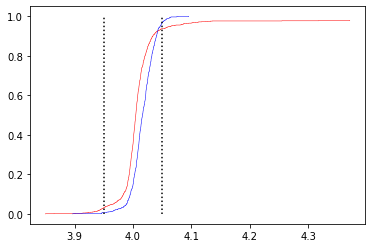

In [8]:

XShish_sorted=np.sort(LEPR_Cpx_Sums)
XShish_sorted2=np.sort(PW_Cpx_Sums)
 
plt.step(np.concatenate([XShish_sorted, XShish_sorted[[-1]]]),
         np.arange(XShish_sorted.size+1)/XShish_sorted.size, color='red', linewidth=0.5)
plt.step(np.concatenate([XShish_sorted2, XShish_sorted2[[-1]]]),
         np.arange(XShish_sorted2.size+1)/XShish_sorted2.size, color='blue', linewidth=0.5)
plt.plot([3.95, 3.95], [0, 1], ':k')
plt.plot([4.05, 4.05], [0, 1], ':k')

(array([  1.,   1.,   4.,  27.,  55., 129., 197., 108.,  35.,   2.]),
 array([14.75884294, 14.90694955, 15.05505615, 15.20316276, 15.35126936,
        15.49937597, 15.64748257, 15.79558918, 15.94369578, 16.09180238,
        16.23990899]),
 <BarContainer object of 10 artists>)

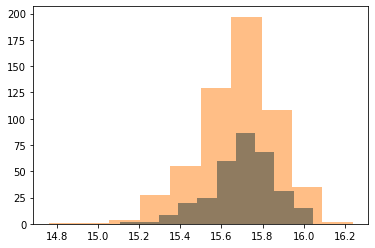

In [9]:
plt.hist(PW_Amp_Sums)
plt.hist(LEPR_Amp_Sums, alpha=0.5)

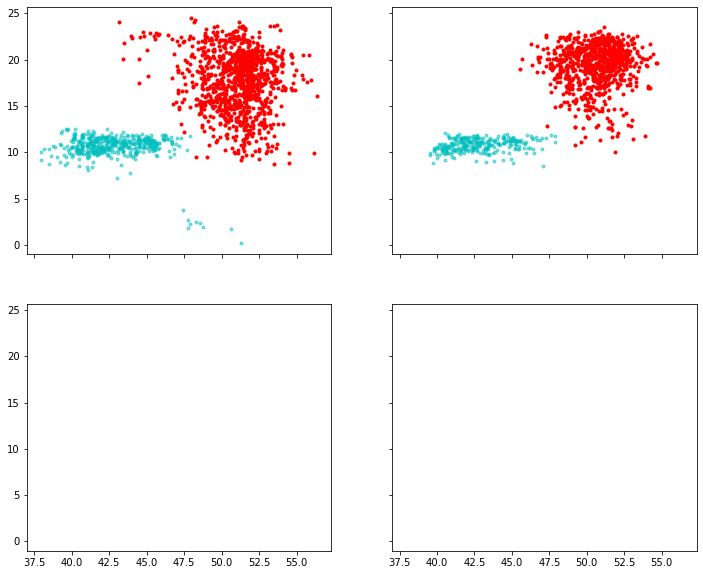

In [10]:
## Viualizing differences
fig, ((ax0, ax1), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
ax0.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
ax0.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['CaO_Amp'], '.c', alpha=0.5)

ax1.plot(PW_Cpx['SiO2_Cpx'], PW_Cpx['CaO_Cpx'], '.r')
ax1.plot(PW_Amp['SiO2_Amp'], PW_Amp['CaO_Amp'], '.c', alpha=0.5)

## Tutorial from https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

In [11]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [163]:
# In my example, 0 is amphibole, 1 is cpx. 

In [12]:
X_test=PW_X
y_test=PW_Y

X_train=LEPR_X
y_train=LEPR_Y
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

cm = confusion_matrix(y_test, dtree_predictions)

In [17]:
cm

array([[271,   6],
       [  0, 815]], dtype=int64)

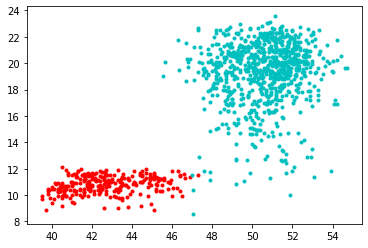

In [18]:
pred_amp_dtree=dtree_predictions==0
pred_cpx_dtree=dtree_predictions==1

plt.plot(PW_Combo['SiO2'].loc[pred_amp_dtree], PW_Combo['CaO'].loc[pred_amp_dtree], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_cpx_dtree], PW_Combo['CaO'].loc[pred_cpx_dtree], '.c')

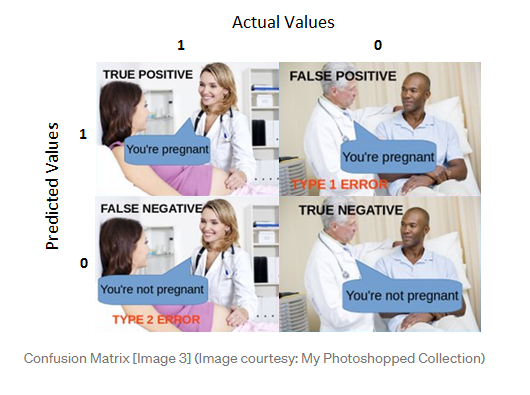

In [20]:
# dividing X, y into train and test data  
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [21]:
len(LEPR_Cpx)

1061

In [22]:
# 451 amphiboles
# 1138 Clinopyroxenes
# Has currently identified all amphiboles as amphiboles, didnt allocate any to cpx
# Has misassigned 11 clinopyroxenes as amphiboles. 
cm


array([[277,   0],
       [  0, 815]], dtype=int64)

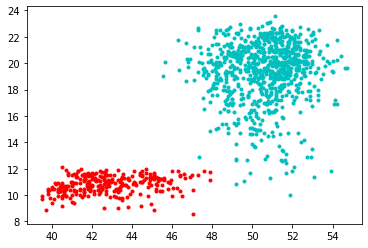

In [23]:
pred_amp_swm=svm_predictions==0
pred_cpx_swm=svm_predictions==1

plt.plot(PW_Combo['SiO2'].loc[pred_amp_swm], PW_Combo['CaO'].loc[pred_amp_swm], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_cpx_swm], PW_Combo['CaO'].loc[pred_cpx_swm], '.c')

## KNN - nearest neigbour

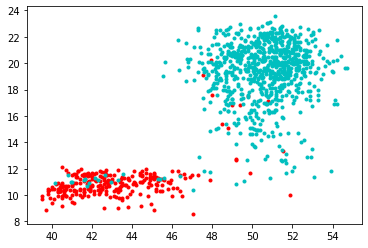

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)

  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

pred_amp_knn=knn_predictions==0
pred_cpx_knn=knn_predictions==1

plt.plot(PW_Combo['SiO2'].loc[pred_amp_knn], PW_Combo['CaO'].loc[pred_amp_knn], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_cpx_knn], PW_Combo['CaO'].loc[pred_cpx_knn], '.c')

# Naive Bayes classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
cm

0.9963369963369964


array([[276,   1],
       [  3, 812]], dtype=int64)

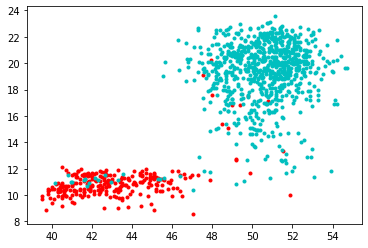

In [28]:
from sklearn.neighbors import KNeighborsClassifier
gnb = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)

  
# creating a confusion matrix
gnb_predictions = gnb.predict(X_test) 
cm = confusion_matrix(y_test, gnb_predictions)

pred_amp_gnb=gnb_predictions==0
pred_cpx_gnb=gnb_predictions==1

plt.plot(PW_Combo['SiO2'].loc[pred_amp_gnb], PW_Combo['CaO'].loc[pred_amp_gnb], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_cpx_gnb], PW_Combo['CaO'].loc[pred_cpx_gnb], '.c')

In [29]:
accuracy

0.967948717948718

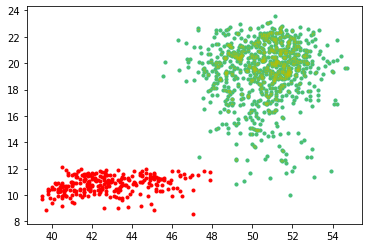

In [30]:
plt.plot(PW_Combo['SiO2'].loc[pred_amp_swm], PW_Combo['CaO'].loc[pred_amp_swm], '.r')
plt.plot(PW_Combo['SiO2'].loc[pred_cpx_swm], PW_Combo['CaO'].loc[pred_cpx_swm], '.c')

plt.plot(PW_Cpx['SiO2_Cpx'], PW_Cpx['CaO_Cpx'], '.y', alpha=0.3)

## Clustering k means

In [98]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()
scaled_features_train = scaler.fit_transform(PW_X)
scaled_features_test = scaler.fit_transform(LEPR_X)

kmeans = KMeans(
init="random",
n_clusters=2,
 n_init=10,
max_iter=300,
random_state=42)

kmeans_trained=kmeans.fit(scaled_features_train)
Classification_kmeans_train=kmeans_sites_train.labels_

## Aglomerative Clustering

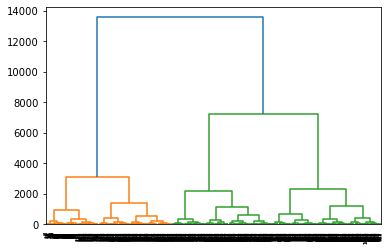

In [100]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [67]:
model_agl = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model_agl.fit(X)
labels = model_agl.labels_

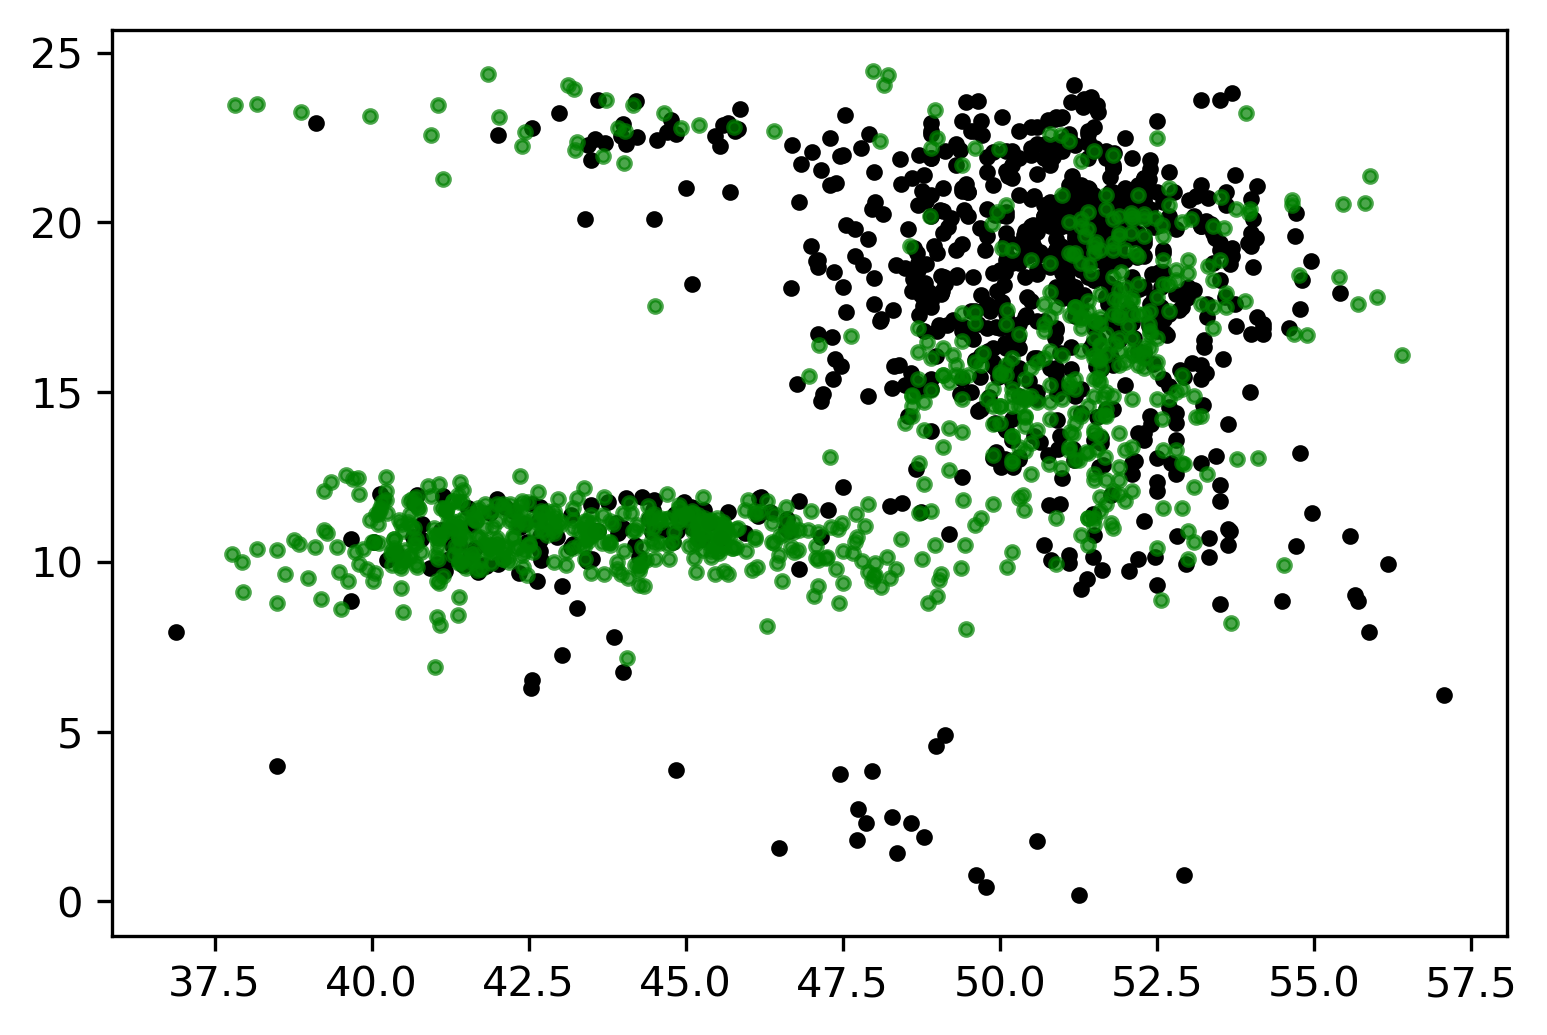

In [68]:
plt.plot(Combo['SiO2'].loc[labels==0], 
         Combo['CaO'].loc[labels==0], '.k')

plt.plot(Combo['SiO2'].loc[labels==1], 
         Combo['CaO'].loc[labels==1], '.g', alpha=0.7)



In [69]:
print('Amps in cluster 0')
display(sum(kmeans_sites.labels_[lencpx:]==0))
display(len(LEPR_Amp))
print('Amps in cluster 1')
display(sum(kmeans_sites.labels_[lencpx:]==1))
display(len(LEPR_Amp))
print('Amps in cluster 2')
display(sum(kmeans_sites.labels_[lencpx:]==2))
display(len(LEPR_Amp))

Amps in cluster 0


556

559

Amps in cluster 1


3

559

Amps in cluster 2


0

559

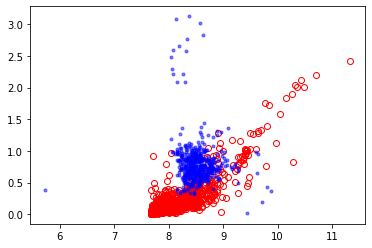

In [81]:
plt.plot(Cpx_true_23ox['SiO2_Amp_cat_23ox']+Cpx_true_23ox['Al2O3_Amp_cat_23ox'], 
         Cpx_true_23ox['Na2O_Amp_cat_23ox']+Cpx_true_23ox['K2O_Amp_cat_23ox'], 'or', mfc="None")
plt.plot(Amp_true_23ox['SiO2_Amp_cat_23ox']+Amp_true_23ox['Al2O3_Amp_cat_23ox'], 
         Amp_true_23ox['Na2O_Amp_cat_23ox']+Amp_true_23ox['K2O_Amp_cat_23ox'], '.b', alpha=0.5)

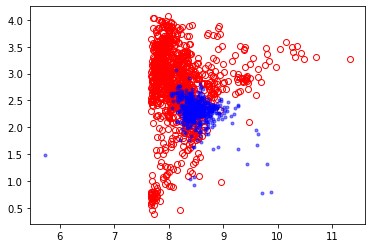

In [83]:
plt.plot(Cpx_true_23ox['SiO2_Amp_cat_23ox']+Cpx_true_23ox['Al2O3_Amp_cat_23ox'], 
         Cpx_true_23ox['Na2O_Amp_cat_23ox']+Cpx_true_23ox['CaO_Amp_cat_23ox'], 'or', mfc="None")
plt.plot(Amp_true_23ox['SiO2_Amp_cat_23ox']+Amp_true_23ox['Al2O3_Amp_cat_23ox'], 
         Amp_true_23ox['Na2O_Amp_cat_23ox']+Amp_true_23ox['CaO_Amp_cat_23ox'], '.b', alpha=0.5)

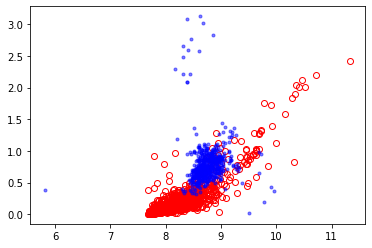

In [82]:
plt.plot(Cpx_true_23ox['SiO2_Amp_cat_23ox']+Cpx_true_23ox['Al2O3_Amp_cat_23ox']+Cpx_true_23ox['TiO2_Amp_cat_23ox'], 
         Cpx_true_23ox['Na2O_Amp_cat_23ox']+Cpx_true_23ox['K2O_Amp_cat_23ox'], 'or', mfc="None")
plt.plot(Amp_true_23ox['SiO2_Amp_cat_23ox']+Amp_true_23ox['Al2O3_Amp_cat_23ox']+Amp_true_23ox['TiO2_Amp_cat_23ox'], 
         Amp_true_23ox['Na2O_Amp_cat_23ox']+Amp_true_23ox['K2O_Amp_cat_23ox'], '.b', alpha=0.5)

In [ ]:
plt.plot(Cpx_true_23ox['SiO2_Amp_cat_23ox']+Cpx_true_23ox['Al2O3_Amp_cat_23ox']+Cpx_true_23ox['TiO2_Amp_cat_23ox'], 
         Cpx_true_23ox['Na2O_Amp_cat_23ox']+Cpx_true_23ox['K2O_Amp_cat_23ox'], 'or', mfc="None")
plt.plot(Amp_true_23ox['SiO2_Amp_cat_23ox']+Amp_true_23ox['Al2O3_Amp_cat_23ox']+Amp_true_23ox['TiO2_Amp_cat_23ox'], 
         Amp_true_23ox['Na2O_Amp_cat_23ox']+Amp_true_23ox['K2O_Amp_cat_23ox'], '.b', alpha=0.5)

In [71]:
sites_cpx_true.head()

,Si_T,Al_T,Al_C,Ti_C,Mg_C,Fe_C,Mn_C,Cr_C,Mg_B,Fe_B,Mn_B,Na_B,Ca_B,Na_A,K_A
0,7.495263,0.265853,0.0,0.035438,2.828532,2.130386,0.0,0.005644,0.0,-0.949577,0.029022,0.0,3.441781,0.102418,0.000000
1,7.448028,0.298864,0.0,0.087196,3.002628,1.909030,0.0,0.001146,0.0,-0.588159,0.035593,0.0,3.074089,0.092713,0.000000
2,7.495184,0.226057,0.0,0.077687,4.091100,0.831214,0.0,0.000000,0.0,2.019060,0.041240,0.0,0.505873,0.051492,0.001882
3,7.461107,0.211113,0.0,0.100218,3.950339,0.943592,0.0,0.005852,0.0,1.841960,0.038870,0.0,0.761355,0.031573,0.000000
4,7.453066,0.314210,0.0,0.091959,3.710904,1.195973,0.0,0.001164,0.0,1.809621,0.041170,0.0,0.654946,0.048549,0.000000


Text(0, 0.5, 'Ca_B site (Leake)')

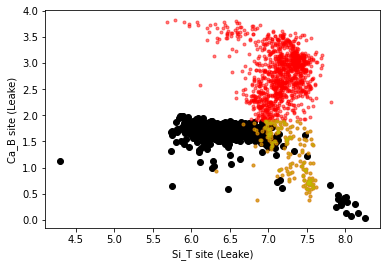

In [106]:
plt.plot(sites_amp_true['Si_T'],
        sites_amp_true['Ca_B'], 'ok')

plt.plot(sites_cpx_true['Si_T'],
        sites_cpx_true['Ca_B'], '.r', alpha=0.5)

Overlaps_CaSpace=sites_cpx_true['Ca_B']<1.9

plt.plot(sites_cpx_true['Si_T'].loc[Overlaps_CaSpace],
        sites_cpx_true['Ca_B'].loc[Overlaps_CaSpace], '.y', alpha=0.5)

plt.xlabel('Si_T site (Leake)')
plt.ylabel('Ca_B site (Leake)')

Text(0, 0.5, 'Ca_B site (Leake)')

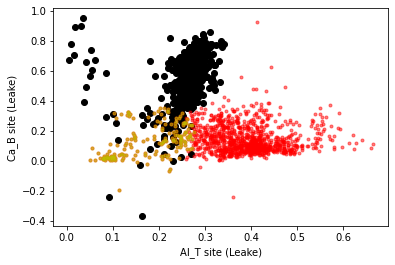

In [115]:
plt.plot(sites_amp_true['Ca_B']/sites_amp_true['Si_T'],
         sites_amp_true['Na_A'], 'ok')

plt.plot(sites_cpx_true['Ca_B']/sites_cpx_true['Si_T'],
         sites_cpx_true['Na_A'],'.r', alpha=0.5)

plt.plot(sites_cpx_true['Ca_B'].loc[Overlaps_CaSpace]/sites_cpx_true['Si_T'].loc[Overlaps_CaSpace],
         sites_cpx_true['Na_A'].loc[Overlaps_CaSpace],'.y', alpha=0.5)
#plt.plot(sites_cpx_true['Al_T'].loc[Overlaps_CaSpace],
        #sites_cpx_true['Si_T'].loc[Overlaps_CaSpace], '.y', alpha=0.5)
plt.xlabel('Al_T site (Leake)')
plt.ylabel('Ca_B site (Leake)')
#plt.ylim([1.5, 2.2])

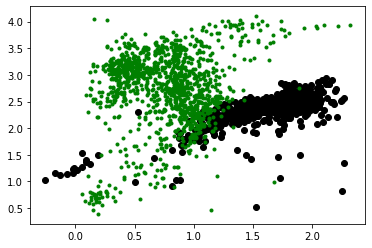

In [77]:
plt.plot(sites_amp_true['Al_T'],
        sites_amp_true['Na_A']+sites_amp_true['K_A']+sites_amp_true['Ca_B'], 'ok')

plt.plot(sites_cpx_true['Al_T'],
        sites_cpx_true['Na_A']+sites_cpx_true['K_A']+sites_cpx_true['Ca_B'], '.g')

# K means splitting of cpx and Amp LEPR data

In [40]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

kmeans = KMeans(
init="random",
n_clusters=2,
 n_init=10,
max_iter=300,
random_state=42)

kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=42)

In [42]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [43]:
# Number of amps misclassified =1
display(sum(kmeans.labels_[lencpx:]))
display(len(LEPR_Amp))

559

560

In [44]:
# Number of amps misclassified =93/1222
display(sum(kmeans.labels_[:lencpx]))
display(len(LEPR_Cpx))

93

1222

In [45]:
# Finding LEPR ones that are misclassified
Combo_cpx_real=Combo.iloc[0:lencpx]
Combo_amp_real=Combo.iloc[lencpx:]
Combo_clust0_cpx=Combo_cpx_real.loc[Combo_cpx_real['Classification']==0]
Combo_clust1_cpx=Combo_cpx_real.loc[Combo_cpx_real['Classification']==1]
Combo_clust2_cpx=Combo_cpx_real.loc[Combo_cpx_real['Classification']==2]

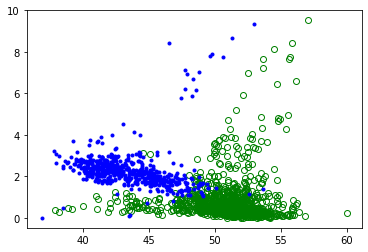

In [50]:

plt.plot(Combo_cpx_real['SiO2'], Combo_cpx_real['Na2O'], 'og', mfc="none")
plt.plot(Combo_amp_real['SiO2'], Combo_amp_real['Na2O'], '.b')

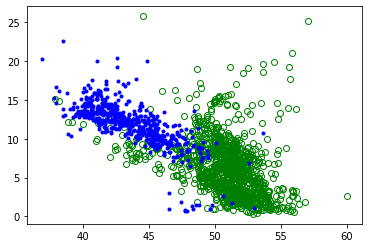

In [51]:

plt.plot(Combo_cpx_real['SiO2'], Combo_cpx_real['Al2O3'], 'og', mfc="none")
plt.plot(Combo_amp_real['SiO2'], Combo_amp_real['Al2O3'], '.b')

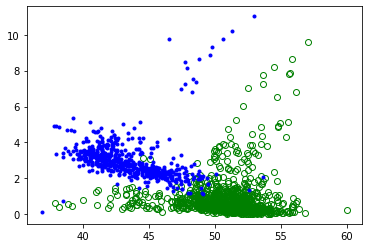

In [52]:

plt.plot(Combo_cpx_real['SiO2'], Combo_cpx_real['Na2O']+Combo_cpx_real['K2O'], 'og', mfc="none")
plt.plot(Combo_amp_real['SiO2'], Combo_amp_real['Na2O']+Combo_amp_real['K2O'], '.b')

## Titanium sites vs. A sites

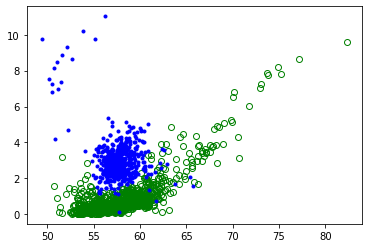

In [59]:

plt.plot(Combo_cpx_real['SiO2']+Combo_cpx_real['Al2O3']+Combo_cpx_real['TiO2'], Combo_cpx_real['Na2O']+Combo_cpx_real['K2O'], 'og', mfc="none")
plt.plot(Combo_amp_real['SiO2']+Combo_amp_real['Al2O3']+Combo_amp_real['TiO2'], Combo_amp_real['Na2O']+Combo_amp_real['K2O'], '.b')

In [ ]:

plt.plot(Combo_cpx_real['SiO2']+Combo_cpx_real['Al2O3']+Combo_cpx_real['TiO2'], Combo_cpx_real['Na2O']+Combo_cpx_real['K2O'], 'og', mfc="none")
plt.plot(Combo_amp_real['SiO2']+Combo_amp_real['Al2O3']+Combo_amp_real['TiO2'], Combo_amp_real['Na2O']+Combo_amp_real['K2O'], '.b')

(0.0, 50.0)

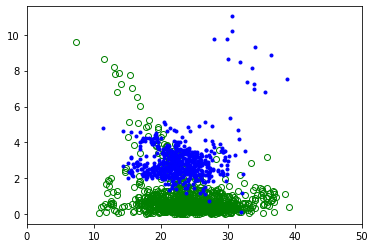

In [55]:

plt.plot(Combo_cpx_real['CaO']+Combo_cpx_real['FeOt'], Combo_cpx_real['Na2O']+Combo_cpx_real['K2O'], 'og', mfc="none")
plt.plot(Combo_amp_real['CaO']+Combo_amp_real['FeOt'], Combo_amp_real['Na2O']+Combo_amp_real['K2O'], '.b')
plt.xlim([0, 50])

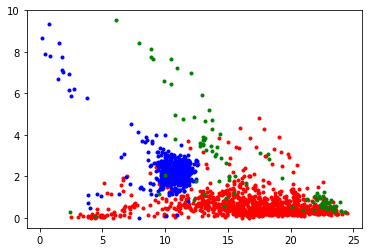

In [10]:
plt.plot(Combo_clust0_cpx['CaO'], Combo_clust0_cpx['Na2O'], '.r')

plt.plot(Combo_amp_real['CaO'], Combo_amp_real['Na2O'], '.b')
plt.plot(Combo_clust1_cpx['CaO'], Combo_clust1_cpx['Na2O'], '.g')
plt.plot(Combo_clust2_cpx['CaO'], Combo_clust2_cpx['Na2O'], '.c')


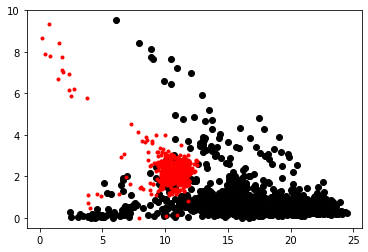

In [13]:
plt.plot(Combo['CaO'].iloc[0:1260], Combo['Na2O'].iloc[0:1260], 'ok')
plt.plot(Combo['CaO'].iloc[1260:], Combo['Na2O'].iloc[1260:], '.r')

In [14]:

from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9, random_state=10)
model.fit(X)
yhat = model.predict(X)
clusters = np.unique(yhat)

# create scatter plot for samples from each cluster


In [15]:
type(X)

numpy.ndarray

In [83]:
## No amphiboles yet. 
Baker_read_Cpx=pt.import_excel('Baker.xlsx', sheet_name='Cpx_All')
Baker_Input_Cpx=Baker_read_Cpx['my_input']
Baker_Cpx=Baker_read_Cpx['Cpxs']
Baker_Cpx_copy=Baker_Cpx.copy()

## No amphiboles yet. 
Baker_read_Opx=pt.import_excel('Baker.xlsx', sheet_name='Opx_All')
Baker_Input_Opx=Baker_read_Opx['my_input']
Baker_Opx=Baker_read_Opx['Opxs']
Baker_Opx_copy=Baker_Opx.copy()

## No amphiboles yet. 
Baker_read_Plag=pt.import_excel('Baker.xlsx', sheet_name='Plag_All')
Baker_Input_Plag=Baker_read_Plag['my_input']
Baker_Plag=Baker_read_Plag['Plags']
Baker_Plag_copy=Baker_Plag.copy()

In [84]:
## No amphiboles yet. 
Adams_read_Cpx=pt.import_excel('Adams.xlsx', sheet_name='Cpx_All')
Adams_Input_Cpx=Adams_read_Cpx['my_input']
Adams_Cpx=Adams_read_Cpx['Cpxs']
Adams_Cpx_copy=Adams_Cpx.copy()

## No amphiboles yet. 
Adams_read_Opx=pt.import_excel('Adams.xlsx', sheet_name='Opx_All')
Adams_Input_Opx=Adams_read_Opx['my_input']
Adams_Opx=Adams_read_Opx['Opxs']
Adams_Opx_copy=Adams_Opx.copy()

In [85]:
Rainier_read_Cpx=pt.import_excel('Rainier.xlsx', sheet_name='Cpx_All')
Rainier_Input_Cpx=Rainier_read_Cpx['my_input']
Rainier_Cpx=Rainier_read_Cpx['Cpxs']
Rainier_Cpx_copy=Rainier_Cpx.copy()

Rainier_read_Amp=pt.import_excel('Rainier.xlsx', sheet_name='Amp_All')
Rainier_Input_Amp=Rainier_read_Amp['my_input']
Rainier_Amp=Rainier_read_Amp['Amps']
Rainier_Amp_copy=Rainier_Amp.copy()

Rainier_read_Opx=pt.import_excel('Rainier.xlsx', sheet_name='Opx_All')
Rainier_Input_Opx=Rainier_read_Opx['my_input']
Rainier_Opx=Rainier_read_Opx['Opxs']
Rainier_Opx_copy=Rainier_Opx.copy()

In [86]:
Lassen_read_Cpx=pt.import_excel('Lassen.xlsx', sheet_name='Cpx_All')
Lassen_Input_Cpx=Lassen_read_Cpx['my_input']
Lassen_Cpx=Lassen_read_Cpx['Cpxs']
Lassen_Cpx_copy=Lassen_Cpx.copy()

Lassen_read_Amp=pt.import_excel('Lassen.xlsx', sheet_name='Amp_All')
Lassen_Input_Amp=Lassen_read_Amp['my_input']
Lassen_Amp=Lassen_read_Amp['Amps']
Lassen_Amp_copy=Lassen_Amp.copy()


In [87]:
Baker_Cpx

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,52.22,0.5007,3.5300,5.32,0.1401,16.67,21.67,0.2527,0.0,0.2984,TP3_cpx1-1
1,52.46,0.3527,2.5085,4.36,0.0958,16.78,22.28,0.2396,0.0,0.5776,TP3_cpx1-2
2,50.74,1.0913,2.0027,11.62,0.2940,15.05,18.08,0.3272,0.0,0.0136,TP3_cpx2
3,51.33,0.5243,2.5074,5.90,0.1708,16.07,21.20,0.2248,0.0,0.1629,TP4_cpx1-1
4,51.78,0.4274,1.7926,7.91,0.2242,15.45,21.04,0.3433,0.0,0.0228,TP4_cpx1-2
...,...,...,...,...,...,...,...,...,...,...,...
98,54.04,0.2990,0.8385,9.92,0.4618,13.92,20.55,0.3657,0.0,0.0000,BG-3TB CpxAc
99,53.05,0.4280,1.2284,10.05,0.3430,13.98,20.76,0.3613,0.0,0.0000,BG-3TB CpxBc
100,50.70,0.5747,1.6429,10.43,0.3332,13.86,19.63,0.3762,0.0,0.0035,BG-7TB CpxBc
101,52.76,0.4492,1.2692,9.29,0.4279,14.29,20.81,0.3729,0.0,0.0000,BG-7TB CpxCc


In [88]:
Cpx_combine=pd.concat([Rainier_Cpx, Baker_Cpx, Adams_Cpx, Lassen_Cpx], axis=0, ignore_index=True)
Opx_combine=pd.concat([Rainier_Opx, Baker_Opx, Adams_Opx], axis=0, ignore_index=True)
Plag_combine=pd.concat([Baker_Plag], axis=0, ignore_index=True)
Amp_combine=pd.concat([Rainier_Amp, Lassen_Amp], axis=0, ignore_index=True)

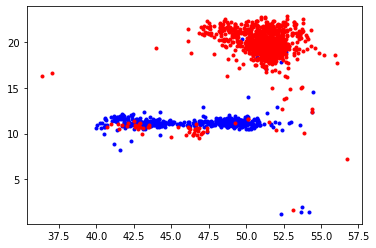

In [92]:
plt.plot(Amp_combine['SiO2_Amp'],Amp_combine['CaO_Amp'], '.b')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['CaO_Cpx'], '.r')


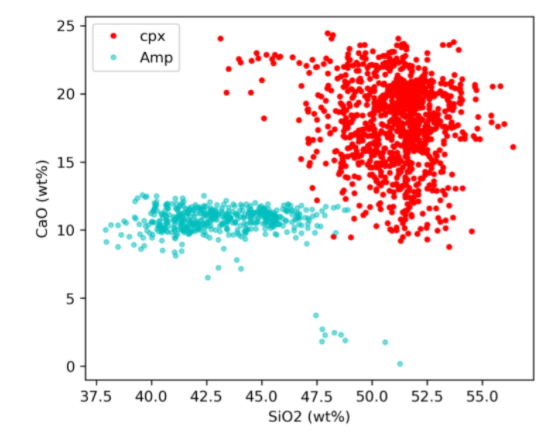

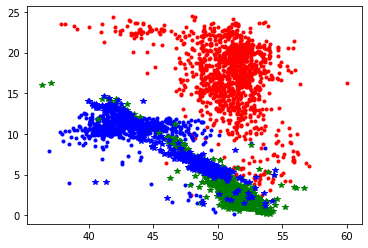

In [62]:
plt.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
plt.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['CaO_Amp'], '.b')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['Al2O3_Cpx'], '*g')
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['Al2O3_Amp'], '*b')


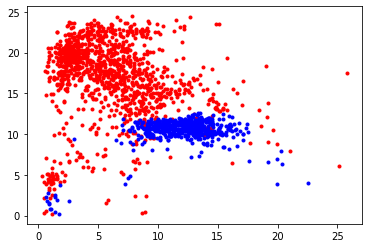

In [39]:
plt.plot(LEPR_Cpx['Al2O3_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
plt.plot(LEPR_Amp['Al2O3_Amp'], LEPR_Amp['CaO_Amp'], '.b')


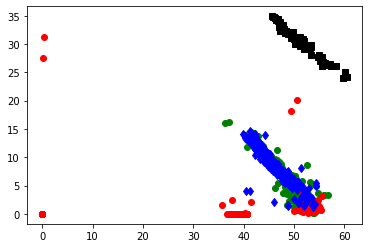

In [21]:
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['Al2O3_Cpx'], 'og')
plt.plot(Opx_combine['SiO2_Opx'], Opx_combine['Al2O3_Opx'], 'or')
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['Al2O3_Amp'], 'db')
plt.plot(Plag_combine['SiO2_Plag'], Plag_combine['Al2O3_Plag'], 'sk')

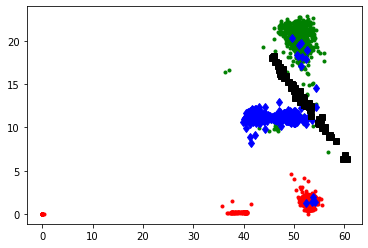

In [22]:
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['CaO_Cpx'], '.g')
plt.plot(Opx_combine['SiO2_Opx'], Opx_combine['CaO_Opx'], '.r')
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['CaO_Amp'], 'db')
plt.plot(Plag_combine['SiO2_Plag'], Plag_combine['CaO_Plag'], 'sk')

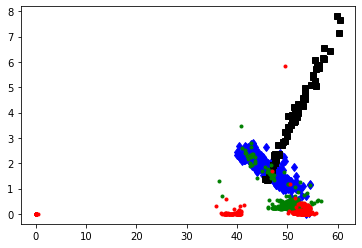

In [24]:
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['Na2O_Amp'], 'db')
plt.plot(Plag_combine['SiO2_Plag'], Plag_combine['Na2O_Plag'], 'sk')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['Na2O_Cpx'], '.g')
plt.plot(Opx_combine['SiO2_Opx'], Opx_combine['Na2O_Opx'], '.r')


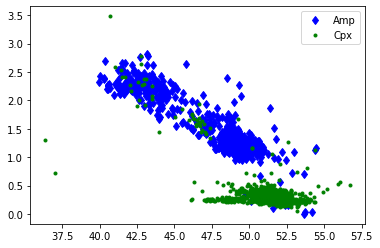

In [26]:
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['Na2O_Amp'], 'db', label='Amp')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['Na2O_Cpx'], '.g', label='Cpx')
plt.legend()


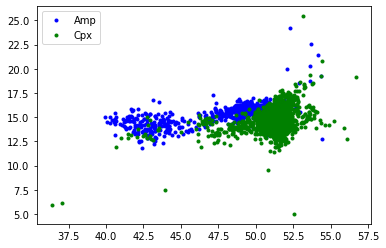

In [29]:
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['MgO_Amp'], '.b', label='Amp')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['MgO_Cpx'], '.g', label='Cpx')
plt.legend()


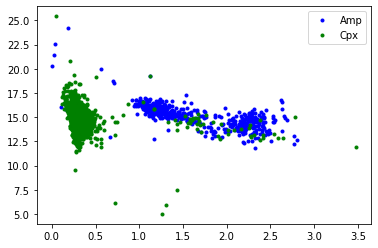

In [30]:
plt.plot(Amp_combine['Na2O_Amp'], Amp_combine['MgO_Amp'], '.b', label='Amp')
plt.plot(Cpx_combine['Na2O_Cpx'], Cpx_combine['MgO_Cpx'], '.g', label='Cpx')
plt.legend()
